# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\SHOLAY\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

# Loading the dataset and checking the top 5 rows

In [3]:
data= pd.read_excel("Week2_challenge_data_source.xlsx")
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# Replacing the handset type with ```undefined``` with NA (not available)

In [4]:
data["Handset Type"].replace("undefined", np.nan, inplace= True)

# Task 1.0

## Top 10 Handset used by Customers

* With all the data in place.

In [5]:
data["Handset Type"].value_counts().head(10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
Name: Handset Type, dtype: int64

Text(0.5, 1.0, 'Top 10 Used by Customers')

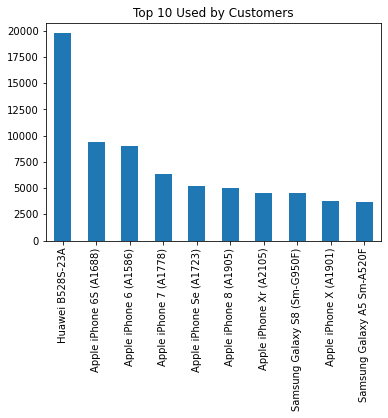

In [34]:
data["Handset Type"].value_counts().head(10).plot(kind= "bar").set_title("Top 10 Used by Customers")

* By dropping the missing data in the dataset will affect the data a lot.*

In [11]:
data.dropna()["Handset Type"].value_counts().head(10)

Huawei B528S-23A                8839
Huawei E5180                     797
Apple iPhone 7 (A1778)           523
Apple iPhone Xr (A2105)          513
Apple iPhone 6S (A1688)          507
Apple iPhone 6 (A1586)           503
Apple iPhone X (A1901)           429
Apple iPhone 8 (A1905)           428
Samsung Galaxy S8 (Sm-G950F)     387
Apple iPhone 8 Plus (A1897)      319
Name: Handset Type, dtype: int64

Text(0.5, 1.0, 'Top 10 Used by Customers')

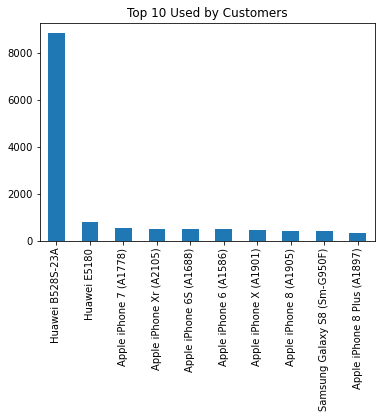

In [35]:
data.dropna()["Handset Type"].value_counts().head(10).plot(kind= "bar").set_title("Top 10 Used by Customers")

## Top 3 Handset manufacturer

* ### Including Bearer without ID

In [14]:
data["Handset Manufacturer"].value_counts().head(3)

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

Text(0.5, 1.0, 'Top 3 Handset manufacturer')

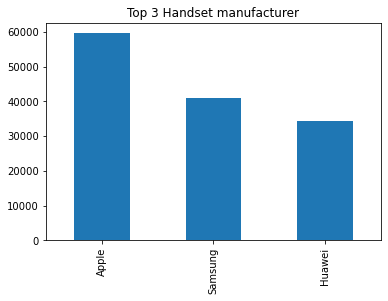

In [21]:
data["Handset Manufacturer"].value_counts().head(3).plot(kind= "bar").set_title("Top 3 Handset manufacturer")

* ### By dropping all the missing data will affect the structure of the dataset a lot

In [13]:
data.dropna()["Handset Manufacturer"].value_counts().head(3)

Huawei     10434
Apple       4362
Samsung     1984
Name: Handset Manufacturer, dtype: int64

Text(0.5, 1.0, 'Top 3 Handset manufacturer')

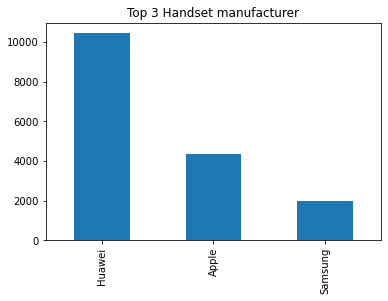

In [20]:
data.dropna()["Handset Manufacturer"].value_counts().head(3).plot(kind= "bar").set_title("Top 3 Handset manufacturer")

# The rest of the analysis will be base on customer with ID
*Those without ID are dropped*

In [15]:
data["Bearer Id"].dropna(inplace= True)

## The Top 5 handsets per handset manufacturer

In [33]:
for manufacture in data.groupby(['Handset Manufacturer']):
    print(pd.DataFrame(manufacture[1]["Handset Type"].value_counts().head()))

                                   Handset Type
A-Link Telecom I. Cubot X18 Plus              2
A-Link Telecom I. Cubot Nova                  1
A-Link Telecom I. Cubot R9                    1
A-Link Telecom I. Cubot Note Plus             1
A-Link Telecom I. Cubot Power                 1
                                      Handset Type
Asustek Asus Zb552Kl Zenfone Go                  7
Asustek Asus Zenfone2 Laser Ze600Kl              5
Asustek Asus Zenfone2 Laser Ze601Kl              4
Asustek Asus Zenfone 2 Laser Ze500Kl             3
Asustek Asus Zenfone Selfie Zd551Kl              2
                       Handset Type
Acer M310                         5
Acer Liquid Zest Plus             2
Acer Liquid Z530                  1
Acer Liquid M220                  1
Acer Zx Z130                      1
                          Handset Type
Adar Stanley Mobile S231             1
                               Handset Type
Alif Communicati. Pulian Cm84             1
                        

# Task 1.1

## Number of xDR sessions

In [56]:
pd.DataFrame(data["MSISDN/Number"].value_counts().head(10))

,MSISDN/Number
3.362632e+10,18
3.362578e+10,17
3.361489e+10,17
3.365973e+10,16
3.367588e+10,15
3.376054e+10,15
3.366716e+10,13
3.378632e+10,12
3.376041e+10,12
3.360452e+10,12


## Session duration

In [57]:
data.pivot_table(index= "MSISDN/Number", values= "Dur. (ms)")

,Dur. (ms)
MSISDN/Number,
3.360100e+10,116720.0
3.360100e+10,181230.0
3.360100e+10,134969.0
3.360101e+10,49878.0
3.360101e+10,18552.0
...,...
3.379000e+10,8810.0
3.379000e+10,140988.0
3.197021e+12,877385.0


## The Total download (DL) and Upload (UL) data for each Users

In [45]:
data.pivot_table(index= "MSISDN/Number", values= ["Total UL (Bytes)", "Total DL (Bytes)"])

,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,
3.360100e+10,842637466.0,36053108.0
3.360100e+10,120755184.0,36104459.0
3.360100e+10,556659663.0,39306820.0
3.360101e+10,401993172.0,20327526.0
3.360101e+10,681565208.5,47140263.5
...,...,...
3.379000e+10,687925212.0,26716429.0
3.379000e+10,444575092.0,35732243.0
3.197021e+12,194828056.0,37295915.0


## The total data volume (in Bytes) during this session for each application

In [65]:
d1= "Social Media DL (Bytes)	Social Media UL (Bytes)	Google DL (Bytes)	Google UL (Bytes)	Email DL (Bytes)	Email UL (Bytes)	Youtube DL (Bytes)	Youtube UL (Bytes)	Netflix DL (Bytes)	Netflix UL (Bytes)	Gaming DL (Bytes)	Gaming UL (Bytes)	Other DL (Bytes)	Other UL (Bytes)".split("	")

In [84]:
datavol= pd.DataFrame(data[d1].sum(), columns= ["Total data volume"])
datavol

,Total data volume
Social Media DL (Bytes),2.693001e+11
Social Media UL (Bytes),4.939298e+09
Google DL (Bytes),8.626186e+11
Google UL (Bytes),3.084833e+11
Email DL (Bytes),2.687611e+11
Email UL (Bytes),7.010648e+10
Youtube DL (Bytes),1.745123e+12
Youtube UL (Bytes),1.651423e+12
Netflix DL (Bytes),1.744039e+12
Netflix UL (Bytes),1.650274e+12


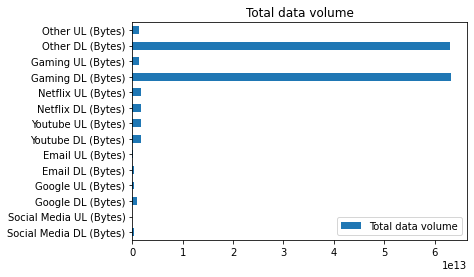

In [95]:
datavol.plot(kind= "barh")
plt.title("Total data volume")
plt.legend(loc= "lower right")

# Task 2